<a href="https://colab.research.google.com/github/shreesha2304/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **OBJECTIVE OF THE PROJECT**


*   The main aim of this project is to predct the customer that might default in the coming month. 
*   At this point of time it is important to understand what does 'default' mean. Whenever a customer , due to any reason, fails to pay the minimum amount within a predetermined period of time, a payment default occurs. If a customer defaults, the authorities asks the reasons and if they are not satisfied, they will inform to the credit buraeus.

*   In this project, we have built an ML model which can predict the customer default beforehand so that we can take appropriate steps to invite minimum default.









First of all, let's import all the libraries required.

In [83]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
 #upgrading the module so as to avoid error while reading excel file
 !pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 8.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# reading the datatset
df = pd.read_excel('/content/drive/My Drive/AlmaBetter/Capstone Project 3/default of credit card clients.xls')

In [ ]:
# checking the no of columns and rows in the datatset
df.shape

(30001, 25)

As we can see, the dataset consists of 30001 rows and 25 columns.

In [ ]:
# a glance through the first five rows
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# a glance through the last 5 rows
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# Let's check the names of the columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

The first row of the dataset contains the names of the columns. It is better to replace those confusing column names with the names in the first row.

In [31]:
# changing the columns names
df.set_axis(df.iloc[0], axis='columns', inplace=True)

In [32]:
df.drop(labels=0, axis=0, inplace=True)

In [8]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Let's get some basic information about the dataset.

In [8]:
#basic structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

All the columns in this dataset are of object type. 

# **Checking missing values**
Missing values are due to the data corruption or failure to capture the data. These values have to be treated in the initial stages since the ML modles do not accept missing values, resulting in an error.

In [122]:
# checking for null values
df.isnull().sum()

0
limit_bal         0
sex               0
education         0
marital_status    0
age               0
ps_sept           0
ps_aug            0
ps_jul            0
ps_jun            0
ps_may            0
ps_apr            0
bill_sept         0
bill_aug          0
bill_jul          0
bill_jun          0
bill_may          0
bill_apr          0
pa_sept           0
pa_aug            0
pa_jul            0
pa_jun            0
pa_may            0
pa_apr            0
defaulted         0
age_group         0
dtype: int64

Fortunately there are no missing values and therefore, we need not handle them.

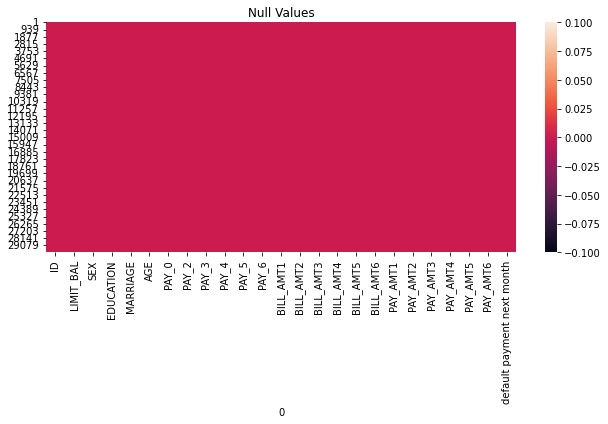

In [10]:
#plotting a graph to understand well
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.tight_layout()

# **Checking duplicated values**
These are redundant entries. These might be due to data entry errors or fault in data collection methods. If we do not remove these redundant values, it unnecessarily increases the size of the data. Moreover, the time taken to process the data significantly drops.

In [11]:
# Checking for duplicated entries
df.duplicated().sum()

0

This dataset doesn't contain any duplicated entries.

In [12]:
#checking the statistical values of features in the dataset
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


For clear understading, let's further change the names of the columns with more appropriate ones.

In [33]:
# renaming the columns
df.rename(columns={'LIMIT_BAL': 'limit_bal',
                   'SEX': 'sex',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'ps_sept',
                   'PAY_2': 'ps_aug',
                   'PAY_3': 'ps_jul',
                   'PAY_4': 'ps_jun',
                   'PAY_5': 'ps_may',
                   'PAY_6': 'ps_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'pa_sept',
                   'PAY_AMT2': 'pa_aug',
                   'PAY_AMT3': 'pa_jul',
                   'PAY_AMT4': 'pa_jun',
                   'PAY_AMT5': 'pa_may',
                   'PAY_AMT6': 'pa_apr',
                   'default payment next month':'defaulted'}, inplace=True)

In [34]:
# setting the index to ID
df.set_index('ID', inplace = True)

In [20]:
df

,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,ps_may,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [16]:
#let's segregate the numerical features
numeric_features=['limit_bal', 'age',
       'ps_sept', 'ps_aug', 'ps_jul', 'ps_jun', 'ps_may', 'ps_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'pa_sept', 'pa_aug', 'pa_jul', 'pa_jun', 'pa_may', 'pa_apr']
       

It is important to find the distribution of these numeric features and find out whether there is any anomaly in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

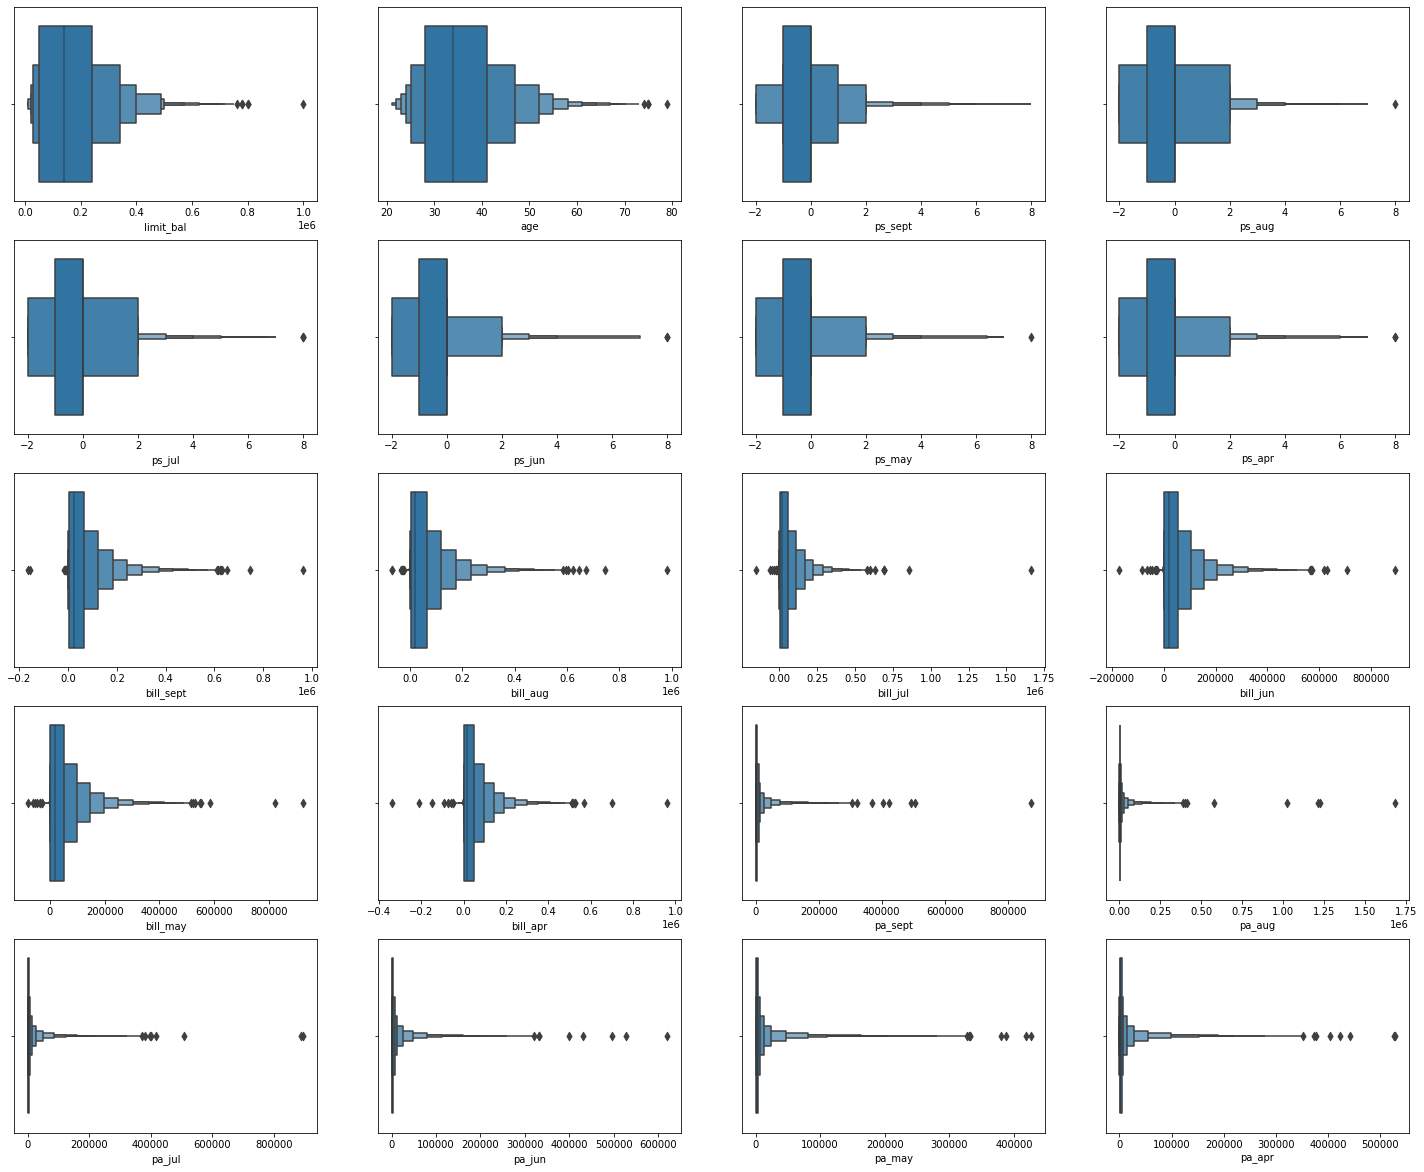

In [17]:
# plotting boxenplots for visualization
plt.figure(figsize=(25,25))
n=1
for i in numeric_features:
  plt.subplot(6,4,n)
  sns.boxenplot(df[i])
  n+=1

Let's once again check the distribution of Limit Balance and it's skewness.

Text(0.5, 1.0, 'Coeff. of Skewness= 0.992866960519544')

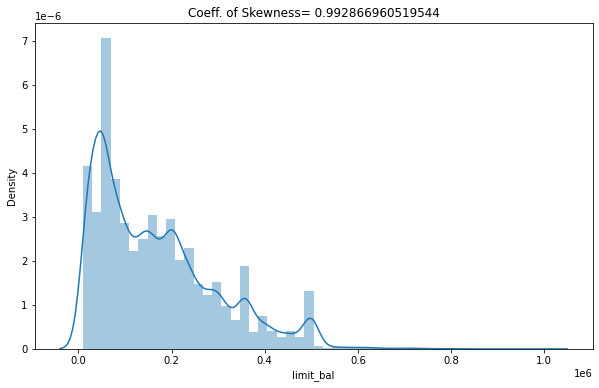

In [21]:
# distribution of limit balance
plt.figure(figsize=(10,6))
sns.distplot(df['limit_bal'])
plt.title('Coeff. of Skewness= '+ str(df['limit_bal'].skew()))


From the boxenplot, we observed that some of the data points had outliers. As far as the limit balance is concerned, there is a customer with balance around 1000000. Let's check the details about it.

In [22]:
# checking the entry where limit_bal>800000
assumed_outlier = df.loc[df['limit_bal']>800000]
assumed_outlier

,ID,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
2198,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


Although the values for this customer is too high, the other entries indicate that he/she is a customer with excellent records and payments. There isn't any unusuality. Hence, we can not drop this entry.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Coeff. of Skeweness= 0.7322458687830562')

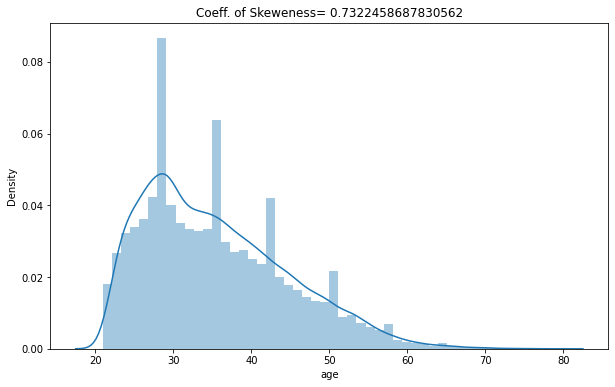

In [21]:
#let's check the distribution of age
plt.figure(figsize=(10,6))
sns.distplot(df['age'])
plt.title('Coeff. of Skeweness= '+ str(df['age'].skew()))

In [28]:
#Checking the entries with age>72
assumed_outlier_age=df.loc[df['age']>72]
assumed_outlier_age

,ID,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
247,247,250000,2,2,1,75,0,-1,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,0
388,388,80000,1,3,1,73,-1,0,0,2,...,70646,72870,75018,3500,4330,3500,3500,3500,5100,1
10700,10700,140000,1,2,1,73,0,0,0,0,...,135772,138675,137197,5082,5008,5000,6016,5018,5264,0
18246,18246,440000,1,1,1,79,0,0,0,0,...,447112,438187,447543,15715,16519,16513,15800,16531,15677,0
25137,25137,180000,1,1,1,75,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
25142,25142,210000,1,2,1,75,0,0,0,0,...,203776,205901,210006,9700,8810,9000,7300,7500,7600,0
29164,29164,360000,2,3,1,73,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29176,29176,160000,2,3,1,74,0,0,0,-1,...,16905,0,19789,3783,2268,16905,0,19789,26442,0
29180,29180,500000,2,2,1,73,-2,-2,-2,-2,...,2835,8896,3850,2826,2652,2835,8896,3850,711,1


Based on the above table, we can consider that most of these customers follow the trend of other customers. We can't drop these entries too.

Let's check the percentage of default in our data.

Text(0.5, 1.0, 'Probability of defaulting Payment')

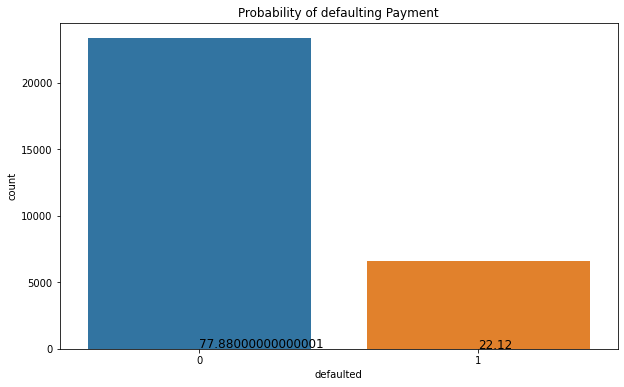

In [25]:
# Plotting no of customers vs status
plt.figure(figsize=(10,6))
count = (df['defaulted'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='defaulted')
for x,y in zip([0,1],count):
    plt.text(x,y,y,fontsize=12)
plt.title('Probability of defaulting Payment')



As we can see from the plot, it is observed that 22.12 percent people have defaulted whereas 77.8 percent people haven't. It clearly indicates that there is a class imbalance, which needs to be treated in futher steps.

Let's divide our customers on the basis of different categories and check the number of customers in each category.

In [59]:
# defining the categories
diff_categories=['sex','education','marital_status']


In [60]:
# checking the count of people in each category
for column in diff_categories:
  print(f'No of customers in different {column} categories are: \n')
  print(df[column].value_counts(),'\n')

No of customers in different sex categories are: 

2    18112
1    11888
Name: sex, dtype: int64 

No of customers in different education categories are: 

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64 

No of customers in different marital_status categories are: 

2    15964
1    13659
3      377
Name: marital_status, dtype: int64 



In [51]:
edu_combine = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[edu_combine, 'education'] = 4
df['education'].value_counts(normalize = True)*100

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: education, dtype: float64

In [52]:
marriage_combine=df['marital_status'] == 0
df.loc[marriage_combine, 'marital_status'] = 3
df['marital_status'].value_counts(normalize = True)*100

2    53.213333
1    45.530000
3     1.256667
Name: marital_status, dtype: float64

In [61]:
cat_df = df[diff_categories]
cat_df['defaulted1'] = df.loc[: ,'defaulted']

In [63]:
cat_df.replace({'sex': {1 : 'MALE', 2 : 'FEMALE'},
                'education' : {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'},
                'marital_status' :  {1 : 'Married', 2 : 'Single', 3 : 'Others'}},inplace=True)

<Figure size 720x360 with 0 Axes>

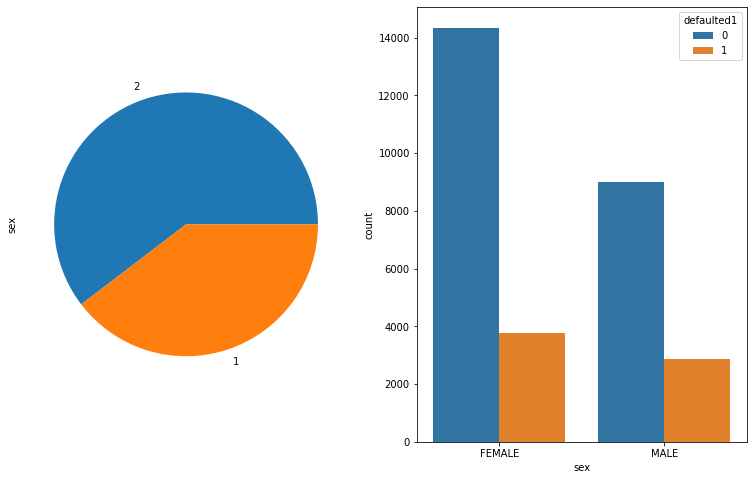

<Figure size 720x360 with 0 Axes>

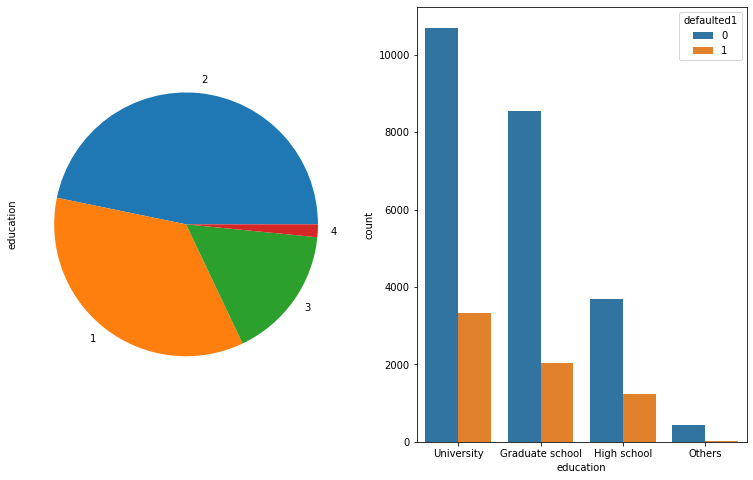

<Figure size 720x360 with 0 Axes>

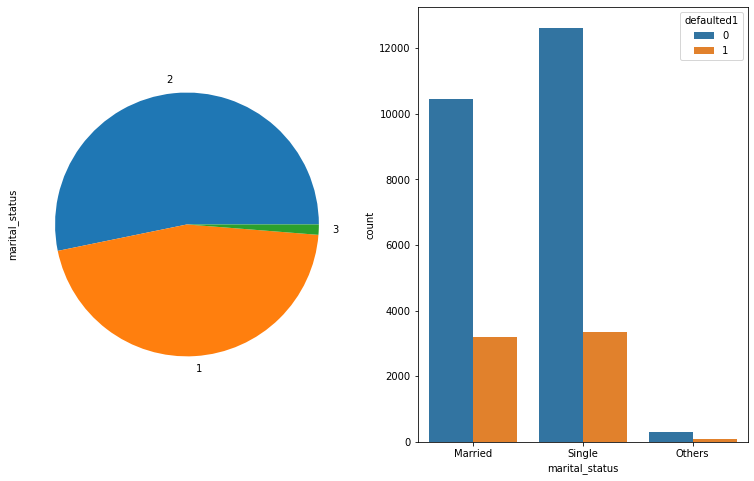

In [64]:
for col in diff_categories:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'defaulted1', data = cat_df)

In [67]:
df['ps_sept'].unique()

array([2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6], dtype=object)

In [68]:
ps_columns=['ps_sept', 'ps_aug', 'ps_jul', 'ps_jun', 'ps_may', 'ps_apr']

In [88]:
edu_combine = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[edu_combine, 'education'] = 4
df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

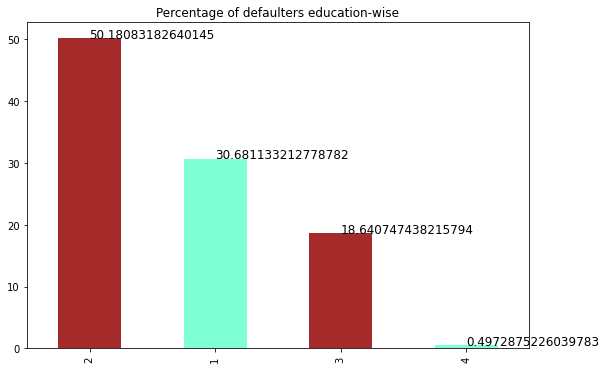

In [71]:
ax = df[df['defaulted'] == 1]['education'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(9,6), color=('brown','aquamarine'))
plt.title("Percentage of defaulters education-wise", fontsize=12)
for x,y in zip([0,1,2,3],ax):
    plt.text(x,y,y,fontsize=12)


In [35]:
bins = [20,30,40,50,60,70,80]
classes = ['20-29','30-39','40-49','50-59','60-69','70-89']
df['age_group'] = pd.cut(x=df.age, bins=bins, labels=classes, right=True)

Text(0.5, 1.0, 'Defaulters number gender-wise')

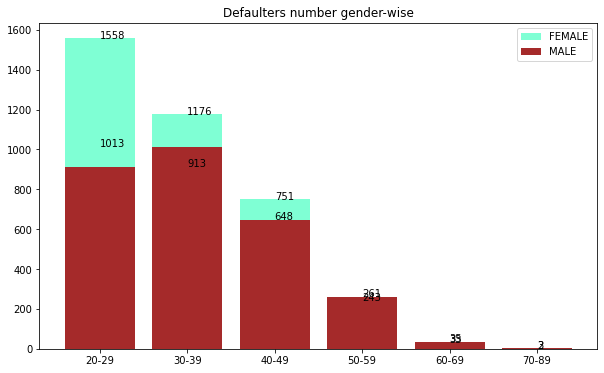

In [82]:
males = df[df['sex'] == 1][df['defaulted'] ==1]['age_group'].value_counts()
females = df[df['sex'] == 2][df['defaulted'] ==1]['age_group'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(females.index, females.values, label='FEMALE', color = ('aquamarine'))
plt.bar(males.index, males.values, label='MALE', color = ('brown'))

for x,y in zip(classes,females):
    plt.text(x,y,y,fontsize=10)

for x,y in zip(classes,males):
    plt.text(x,y,y,fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize= 10)

plt.legend(loc='upper right', fontsize=10)
plt.title("Defaulters number gender-wise", fontsize=12)

In [83]:
edu_combine = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[edu_combine, 'education'] = 4
males =df[df['sex'] == 1][df['defaulted'] ==1]['education'].value_counts()
females = df[df['sex'] == 2][df['defaulted'] ==1]['education'].value_counts()

In [87]:
martial_state = (df['marital_status'] ==0)
df.loc[martial_state, 'marital_status'] = 3


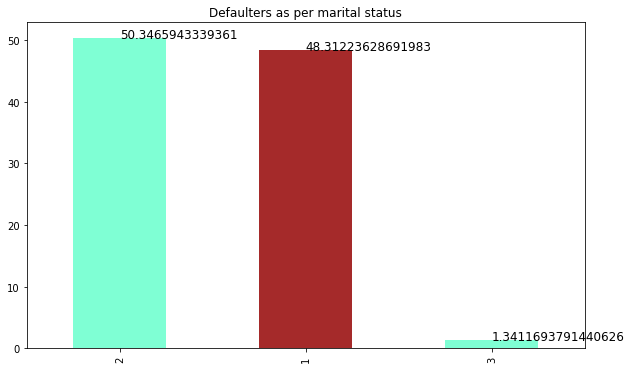

In [89]:
ax = df[df['defaulted'] == 1]['marital_status'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(10,6), color = ('aquamarine','brown'))

plt.title("Defaulters as per marital status", fontsize=12)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

Text(0.5, 1.0, 'Age wise distribution of defaulted customers')

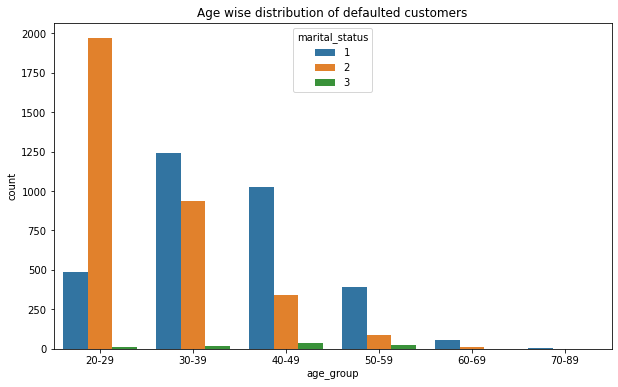

In [92]:
plt.figure(figsize=(10,6))
has_defaulted=df[df['defaulted']==1]
sns.countplot(x='age_group',hue='marital_status',data=has_defaulted)
plt.title('Age wise distribution of defaulted customers')

In [101]:
education_df=pd.DataFrame(df.groupby(['education']).limit_bal.median()).reset_index()

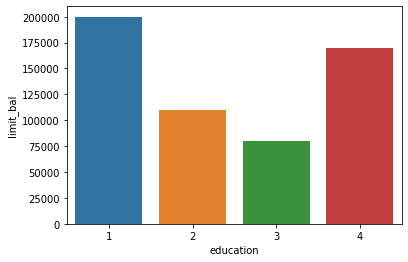

In [108]:
sns.barplot(x=education_df['education'],y=education_df['limit_bal'])

Text(0.5, 1.0, 'Credit limit & default next month')

<Figure size 720x432 with 0 Axes>

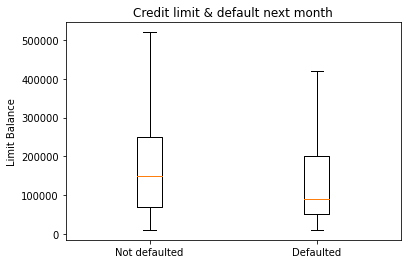

In [14]:
def_0 = df.loc[df['defaulted'] == 0,'limit_bal']
def_1 = df.loc[df['defaulted'] == 1,'limit_bal']

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.boxplot([def_0, def_1],  showfliers=False)

ax.set_xticklabels(['Not defaulted',"Defaulted"])
ax.set_ylabel('Limit Balance')
ax.set_title('Credit limit & default next month')



In [15]:
df

,ID,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [25]:
df

,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,ps_may,...,bill_jun,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


ValueError: ignored

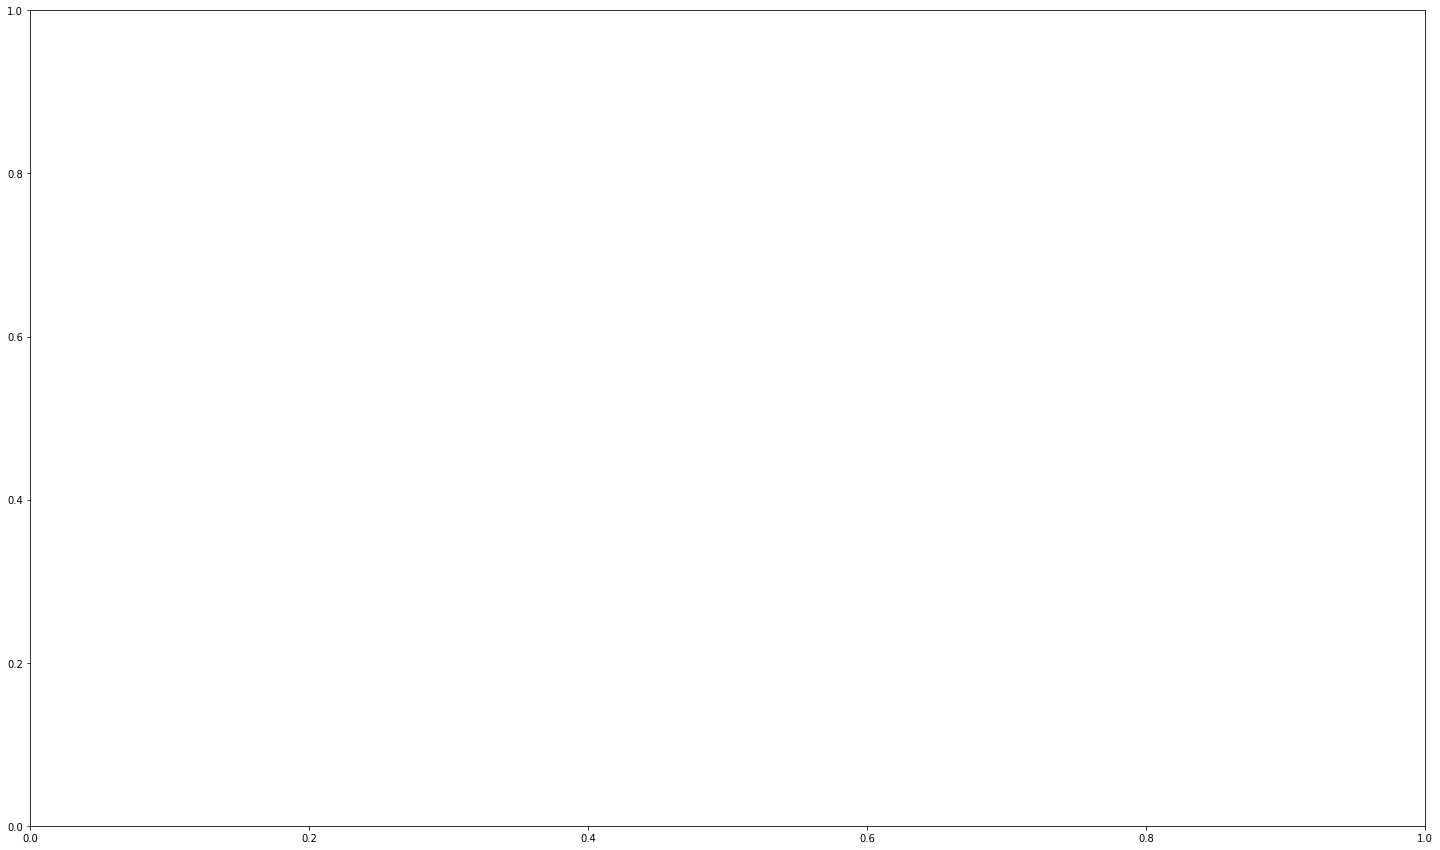

In [29]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu" , ax=ax)

In [56]:
df_new=df.drop(['age_group'],axis=1)

In [57]:
df_new.limit_bal  = df_new.limit_bal.astype("int64")
df_new.age  = df_new.age.astype("int64")
df_new.defaulted= df_new.defaulted.astype("int64")

In [58]:
pd.get_dummies( columns= ['sex', 'education'], prefix = ['sex', 'education'], data = df_new, drop_first = True)

,limit_bal,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,ps_may,ps_apr,bill_sept,...,pa_may,pa_apr,defaulted,sex_2,education_1,education_2,education_3,education_4,education_5,education_6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,1,0,1,0,0,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,1,0,1,0,0,0,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,0,1,0,1,0,0,0,0
4,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,0,1,0,1,0,0,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,5000,1000,0,0,0,0,1,0,0,0
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,0,0,0,1,0,0,0
29998,30000,2,37,4,3,2,-1,0,0,3565,...,2000,3100,1,0,0,1,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split

In [61]:
X = df_new.iloc[:, :-1]
y = df_new['defaulted']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y )

In [108]:
y_train= y_train.astype('int')

In [109]:
Y=Y.astype('int')

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
params = {'n_estimators':[50,60,75,100], 'max_depth':[3, 5, 7,9,11,15]}
classifier = GridSearchCV(rfc, param_grid = params, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15],
                         'n_estimators': [50, 60, 75, 100]},
             scoring='roc_auc')

In [74]:
classifier.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [110]:
y_pred_train=classifier.predict(X_train)

In [111]:
y_test=y_test.astype('int')

In [117]:
y_pred.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [115]:
y_test

ID
8942     0
17619    1
27896    0
16104    0
4423     0
        ..
27934    0
26624    0
21751    0
14889    0
20706    0
Name: defaulted, Length: 9000, dtype: int64

In [78]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [118]:
accuracy_score(y_pred,y_test)

0.8187777777777778

In [119]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error


In [120]:
print(classification_report(y_test,y_pred))
print(confusion_matrix( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6664  345]
 [1286  705]]


[[6664  345]
 [1286  705]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

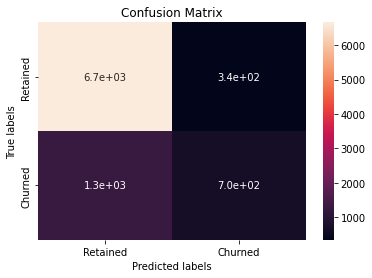

In [121]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [82]:
df

,limit_bal,sex,education,marital_status,age,ps_sept,ps_aug,ps_jul,ps_jun,ps_may,...,bill_may,bill_apr,pa_sept,pa_aug,pa_jul,pa_jun,pa_may,pa_apr,defaulted,age_group
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,20-29
2,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20-29
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30-39
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30-39
5,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,30-39
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190,0,1837,3526,8998,129,0,0,0,40-49
29998,30000,1,2,2,37,4,3,2,-1,0,...,20582,19357,0,0,22000,4200,2000,3100,1,30-39


In [98]:
X = df_new.iloc[:, :-1]
y = df_new['defaulted']

In [99]:
numerical_features=X.drop(columns=['sex','education','marital_status','age'])
num_columns=numerical_features.columns.to_list()